In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("18-concrete_data.csv")

In [7]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [9]:
df.shape

(1030, 9)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [13]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [15]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [17]:
df.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

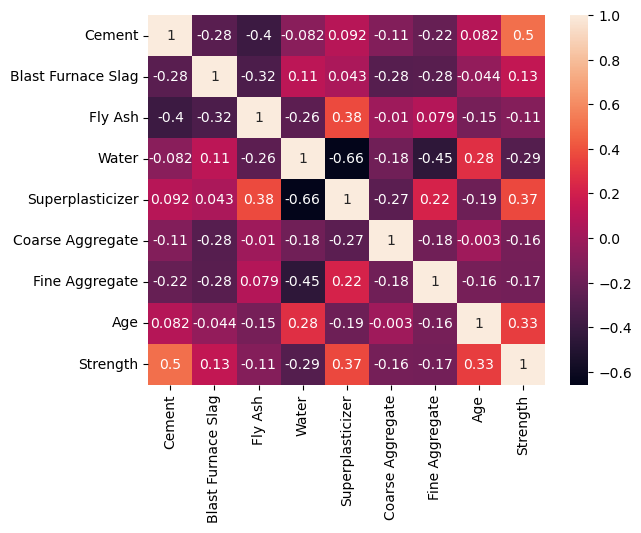

In [19]:
sns.heatmap(df.corr(),annot=True)
plt.show()

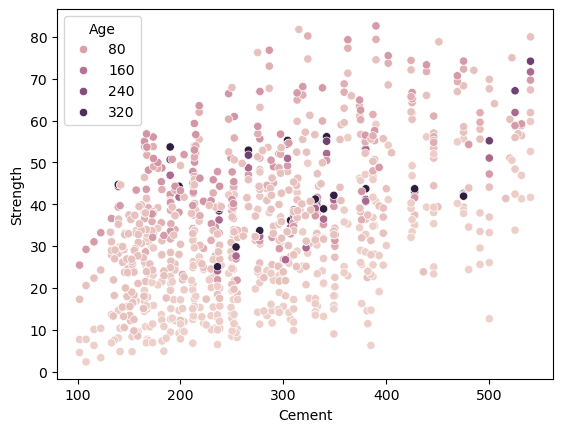

In [21]:
sns.scatterplot(data=df, x="Cement", y="Strength", hue="Age")
plt.show()

In [25]:
X = df.drop("Strength",axis=1)
y = df["Strength"]

In [27]:
from sklearn.model_selection import train_test_split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [67]:
from sklearn.tree import DecisionTreeRegressor

In [69]:
# first weak learner
tree_reg1 = DecisionTreeRegressor(max_depth = 3)
tree_reg1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [71]:
# Residual Error from the first decision tree
y2 = y_train - tree_reg1.predict(X_train)

In [73]:
#second weak learner
tree_reg2 = DecisionTreeRegressor(max_depth = 4)
tree_reg2.fit(X_train, y2)

DecisionTreeRegressor(max_depth=4)

In [75]:
# Residual error of the second weak learner
y3 = y2 - tree_reg2.predict(X_train)
y3[:5]

79     12.137971
193    -5.544362
367     1.331238
181    10.732270
711     9.237628
Name: Strength, dtype: float64

In [77]:
#third weak learner
tree_reg3 = DecisionTreeRegressor(max_depth = 4)
tree_reg3.fit(X_train, y3)

DecisionTreeRegressor(max_depth=4)

In [79]:
y4 = y3 - tree_reg3.predict(X_train)
y4[:5]

79     10.453889
193    -4.857146
367     2.018454
181     2.618962
711     5.666001
Name: Strength, dtype: float64

In [81]:
# let's calculate the final score (we can obviously increase the number of weak learners if we want)
y_pred = sum(tree.predict(X_test) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [83]:
from sklearn.metrics import r2_score

In [85]:
r2_score(y_test, y_pred)

0.7385054809098828

In [87]:
from sklearn.ensemble import GradientBoostingRegressor

In [89]:
gbr = GradientBoostingRegressor(n_estimators=3, max_depth=3, learning_rate=0.1)

In [91]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=3)

In [93]:
y_pred = gbr.predict(X_test)

In [95]:
r2_score(y_test, y_pred)

0.3082164098880331

In [97]:
gbr = GradientBoostingRegressor()

In [99]:
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)
r2_score(y_test, y_pred)

0.9076337455547574

In [101]:
#hyperparameter tuning

In [105]:
params = {
    "n_estimators": [100,150,200],
    "max_depth": [3,4,5],
    "loss": ["squared_error", "absolute_error", "huber","quantile"],
    "learning_rate": [0.01,0.1,0.5]
}

In [107]:
from sklearn.model_selection import RandomizedSearchCV

In [109]:
rscv = RandomizedSearchCV(estimator=GradientBoostingRegressor(),param_distributions=params,cv=5,n_jobs=-1)

In [111]:
rscv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5],
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [100, 150, 200]})

In [113]:
rscv.best_params_

{'n_estimators': 200,
 'max_depth': 3,
 'loss': 'squared_error',
 'learning_rate': 0.1}

In [115]:
gbr = GradientBoostingRegressor(n_estimators=200,max_depth=3,loss="squared_error",learning_rate=0.1)

In [117]:
gbr.fit(X_train,y_train)
y_pred = gbr.predict(X_test)
r2_score(y_test, y_pred)

0.9237206896531867

In [119]:
rscv.best_score_

np.float64(0.9114162389629741)